<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

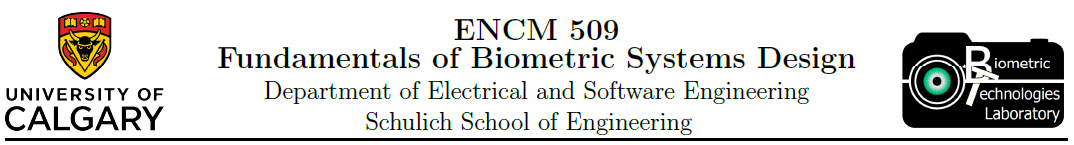

<center>
    <h1>Laboratory Experiment #3</h1>
    <h2>Biometric-based verification: Signature</h2>
</center>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import os
import math

## Loading Signatures

In [4]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# this is the place where the folders "genuine" and "impostor" are
# change it to point to your dataset.
base_dir = os.getcwd() + '/signature_samples/biometrics/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_impostor = base_dir + 'impostor/'

# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

In [5]:
print('Size of the "auth_lst" vector: %d' % (len(auth_lst)))
print('Size of the "imp_lst" vector: %d' % (len(imp_lst)))

Size of the "auth_lst" vector: 30
Size of the "imp_lst" vector: 30


## Classification: selecting subset to train

In [6]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = 20

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = 20

# usually we don't know the final size of train_set because
# each signature has different number of points. 
# to later on use 'concatenate', is necessary to take the first sample outside the loop
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)

In [7]:
print('We will use these data for training the Gaussian Mixture Model')
print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS ))
print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS))

We will use these data for training the Gaussian Mixture Model
The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20


### Training with the Gaussian Mixture Model

In [8]:
# Training the GaussianMixture model from Scikit-Learn library
# the .fit(...) will perform the training step using the "train_set" 
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

### Testing with the remaining signature samples

In [9]:
# to store all the scores calculated
aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

20: -17.3776
21: -17.1263
22: -16.9880
23: -17.1678
24: -17.3225
25: -17.9001
26: -17.3844
27: -17.0079
28: -16.4650
29: -17.3440


### Testing with the forged (impostor) data

In [10]:
fScores = []
for i in range(numForgedSigs):
    # taking from the impostor
    sample =  np.reshape(imp_lst[i], (-1,4))
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    fScores.append(score)

0: -259.6719
1: -151.4067
2: -160.0320
3: -430.8104
4: -314.0693
5: -271.8818
6: -251.1747
7: -292.4698
8: -339.3896
9: -169.6260
10: -149.4230
11: -266.0317
12: -293.0441
13: -230.0776
14: -550.9508
15: -271.9084
16: -165.3934
17: -277.3499
18: -263.0692
19: -735.0631
20: -185.0772
21: -325.6368
22: -158.1718
23: -218.1522
24: -149.8170
25: -140.5515
26: -156.8752
27: -206.2413
28: -167.0297
29: -594.6883


### Calculating mean and std of the scores

In [11]:
# authentic set
aMu = np.mean(aScores)
aStd = np.std(aScores)

# impostor set
fMu = np.mean(fScores)
fStd = np.std(fScores)

print('Average of authentic scores: %.4f' % (aMu))
print('Average of forgery scores: %.4f' % (fMu))

Average of authentic scores: -17.2083
Average of forgery scores: -271.5028


### Probability Density Function (PDF) for forged and authentic data

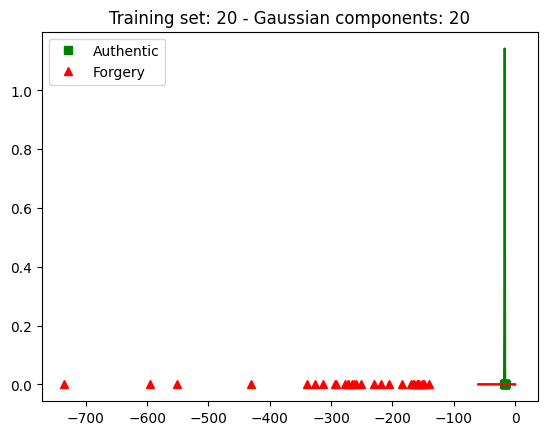

In [12]:
# change this range for your set
x = np.arange(-60, 0, 0.01)

aProb = norm.pdf(x, loc=aMu, scale=aStd)
fProb = norm.pdf(x, loc=fMu, scale=fStd)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

#### Based on your data, might be difficult to see the distributions together. Plot in separated images is one solution:

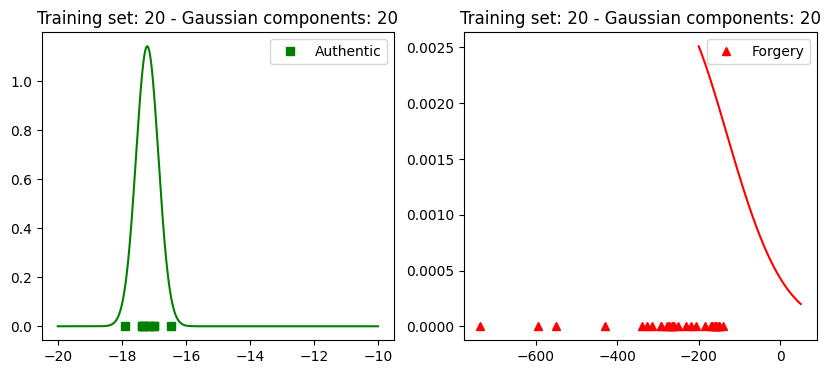

In [13]:
plt.figure(figsize=(10,4))

# Authentic set
x = np.arange(-20, -10, 0.01)
aProb = norm.pdf(x, loc=aMu, scale=aStd)

plt.subplot(1,2,1)
plt.plot(x, aProb, 'g')
plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));


# Forged (impostor) set
x = np.arange(-200, 50, 0.01)
fProb = norm.pdf(x, loc=fMu, scale=fStd)

plt.subplot(1,2,2)
plt.plot(x, fProb, 'r')
plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
plt.legend();
plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

## Introduction 
FILL IN

**Specific Questions**

A detailed description of each exercise to be included in your report (10 marks total) is given below:

- **Exercise 1** (4 marks): Create  your own data (three sets of signatures recorded as `.csv` files), or the data provided on D2L. Use the sample Notebook file `Lab3-SigVerif GMM.ipynb`  to classify set 1 (genuine) and set 2 (impostor). Follow the instructions described in  Section 2.2 and repeat this process for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. Include the 4 sets of distribution plots (figures) for your report. Include a brief analysis of how varying the above parameters influence  the classification results.
		
	 Plot the matching scores' PDFs of the *authentic* (genuine) and *forged* (impostor) sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Use two other different sets of parameters, see the difference of plotting the pair of curves (authentic and impostor) together and separately. 

In [26]:
base_dir = os.getcwd() + '/custom-sig/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_impostor = base_dir + 'impostor/'

# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

In [27]:
def gmm(NUMTRAININGPATTERNS, NUMGCOMPONENTS):
    
    train_set = np.reshape(auth_lst[0], (-1,4))
    
    for i in range(1,NUMTRAININGPATTERNS):
        sample = np.reshape(auth_lst[i], (-1,4))
        train_set = np.concatenate((train_set, sample), axis=0)
        
    gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)
    
    # Calculate true scores 
    aScores = []
    
    for i in range(NUMTRAININGPATTERNS, total_signatures):
        sample =  np.reshape(auth_lst[i], (-1,4))
        # compute the per-sample average log-likelihood of the given data.
        score = gmm.score(sample)
        #print('%d: %.4f' % (i, score))
        # add the score calculated to the list aScores
        aScores.append(score)
        
    fScores = []
    
    for i in range(numForgedSigs):
        # taking from the impostor
        sample =  np.reshape(imp_lst[i], (-1,4))
        score = gmm.score(sample)
        #print('%d: %.4f' % (i, score))
        fScores.append(score)
        
    return aScores, fScores 


In [28]:
# Caculate scores using various training data and GMM components
aScore_1, fScore_1 = gmm(25, 20)
aScore_2, fScore_2 = gmm(25, 60)
aScore_3, fScore_3 = gmm(15, 20)
aScore_4, fScore_4 = gmm(15, 60)

aScores = [aScore_1, aScore_2, aScore_3, aScore_4]
fScores = [fScore_1, fScore_2, fScore_3, fScore_4]
train = [25, 25, 15, 15]
comp = [20, 60, 20, 60]

In [32]:
for i in range(0, 4):

    print('Training set: {} - Gaussian components: {}\n\taMu = {}\n\taStd = {}\n\tfMu = {}\n\tfStd = {}'.format(train[i], comp[i], np.mean(aScores[i]), np.std(aScores[i]), np.mean(fScores[i]), np.std(fScores[i])))
    # authentic set
    aMu = np.mean(aScores[i])
    aStd = np.std(aScores[i])

    # impostor set
    fMu = np.mean(fScores[i])
    fStd = np.std(fScores[i])

Training set: 25 - Gaussian components: 20
	aMu = -18.275669343870508
	aStd = 2.0691072665488925
	fMu = -44.5739087659013
	fStd = 12.531829829774487
Training set: 25 - Gaussian components: 60
	aMu = -20.109149441988237
	aStd = 3.402680055744092
	fMu = -67.77678376974733
	fStd = 22.922201272516602
Training set: 15 - Gaussian components: 20
	aMu = -17.25126084837944
	aStd = 1.8802993520876135
	fMu = -50.124698151067946
	fStd = 16.05463080197813
Training set: 15 - Gaussian components: 60
	aMu = -22.144540417729242
	aStd = 5.047084514714677
	fMu = -92.67708491889097
	fStd = 49.68556161147408


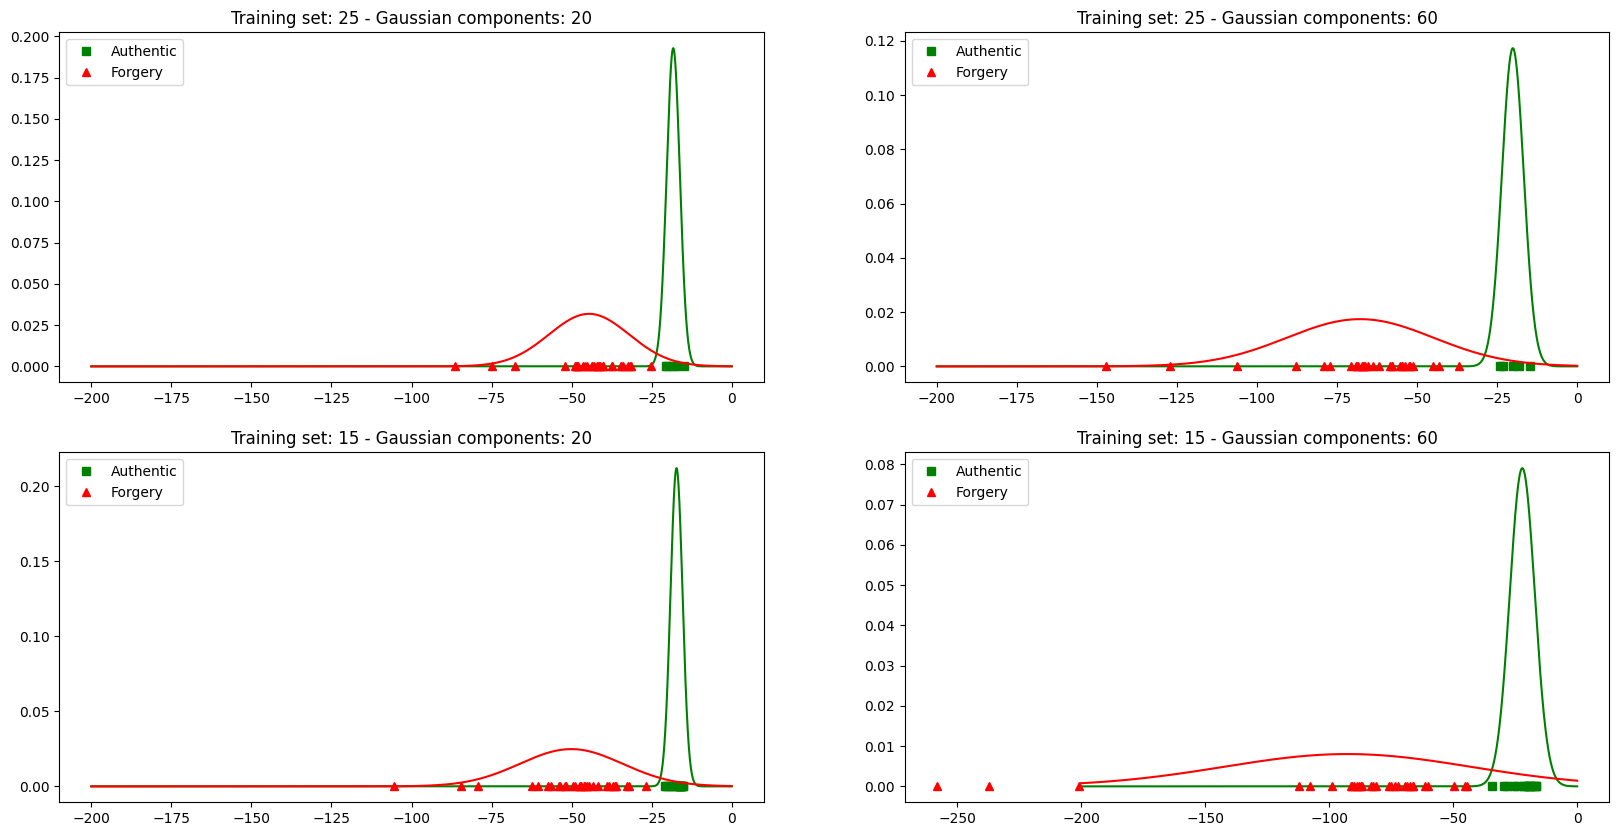

In [33]:
plt.figure(figsize=(20,10))
x = np.arange(-200, 0, 0.01)

for i in range(0, 4):

    plt.subplot(2,2,i+1)
    aProb = norm.pdf(x, loc=np.mean(aScores[i]), scale=np.std(aScores[i]))
    fProb = norm.pdf(x, loc=np.mean(fScores[i]), scale=np.std(fScores[i]))
    plt.plot(x, aProb, 'g')
    plt.plot(aScores[i], np.zeros(len(aScores[i])), 'gs', lw=2, label='Authentic')
    plt.plot(x, fProb, 'r')
    plt.plot(fScores[i], np.zeros(len(fScores[i])), 'r^', lw=2, label='Forgery')
    plt.legend();
    plt.title('Training set: {} - Gaussian components: {}'.format(train[i], comp[i]));

plt.show()

## STILL NEED TO DO FOR Ex. 1
Include a brief analysis of how varying the above parameters influence the classification results. <br> <br>
	 Plot the matching scores' PDFs of the *authentic* (genuine) and *forged* (impostor) sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Use two other different sets of parameters, see the difference of plotting the pair of curves (authentic and impostor) together and separately. 

**^^ I THINK THEY JUST FORGOT TO DELETE THE REWRITE OF THE QUESTION? IDK IT IS KINDA ODD**

- **Exercise 2** (4 marks): Consider the genuine set and the second set of impostor signatures that are very different (in shape, length, i.e. a different writing or another person signature). 
	Repeat the process as described  in Exercise 1,  for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. 
	Plot the matching scores' PDFs of the *authentic*  (genuine) and *impostor* sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Compare these results against the results of Exercise 1.

In [34]:
base_dir = os.getcwd() + '/custom-sig/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_impostor = base_dir + 'other/'

# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

In [35]:
def gmm(NUMTRAININGPATTERNS, NUMGCOMPONENTS):
    
    train_set = np.reshape(auth_lst[0], (-1,4))
    
    for i in range(1,NUMTRAININGPATTERNS):
        sample = np.reshape(auth_lst[i], (-1,4))
        train_set = np.concatenate((train_set, sample), axis=0)
        
    gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)
    
    # Calculate true scores 
    aScores = []
    
    for i in range(NUMTRAININGPATTERNS, total_signatures):
        sample =  np.reshape(auth_lst[i], (-1,4))
        # compute the per-sample average log-likelihood of the given data.
        score = gmm.score(sample)
        #print('%d: %.4f' % (i, score))
        # add the score calculated to the list aScores
        aScores.append(score)
        
    fScores = []
    
    for i in range(numForgedSigs):
        # taking from the impostor
        sample =  np.reshape(imp_lst[i], (-1,4))
        score = gmm.score(sample)
        #print('%d: %.4f' % (i, score))
        fScores.append(score)
        
    return aScores, fScores 


In [36]:

# Caculate scores using various training data and GMM components
aScore_1, fScore_1 = gmm(25, 20)
aScore_2, fScore_2 = gmm(25, 60)
aScore_3, fScore_3 = gmm(15, 20)
aScore_4, fScore_4 = gmm(15, 60)

aScores = [aScore_1, aScore_2, aScore_3, aScore_4]
fScores = [fScore_1, fScore_2, fScore_3, fScore_4]
train = [25, 25, 15, 15]
comp = [20, 60, 20, 60]
for i in range(0, 4):

    print('Training set: {} - Gaussian components: {}\n\taMu = {}\n\taStd = {}\n\tfMu = {}\n\tfStd = {}'.format(train[i], comp[i], np.mean(aScores[i]), np.std(aScores[i]), np.mean(fScores[i]), np.std(fScores[i])))
    # authentic set
    aMu = np.mean(aScores[i])
    aStd = np.std(aScores[i])

    # impostor set
    fMu = np.mean(fScores[i])
    fStd = np.std(fScores[i])


Training set: 25 - Gaussian components: 20
	aMu = -18.100001695480778
	aStd = 1.9828165018224573
	fMu = -324.38264255963054
	fStd = 721.2783839211709
Training set: 25 - Gaussian components: 60
	aMu = -20.3160902976922
	aStd = 3.51983270819926
	fMu = -598.641452465751
	fStd = 1096.916003629888
Training set: 15 - Gaussian components: 20
	aMu = -17.612565143336308
	aStd = 1.9248098675778536
	fMu = -806.9460793954136
	fStd = 1674.836280157661
Training set: 15 - Gaussian components: 60
	aMu = -22.27424311444447
	aStd = 4.453740934764205
	fMu = -3203.174333011909
	fStd = 6314.567626385379


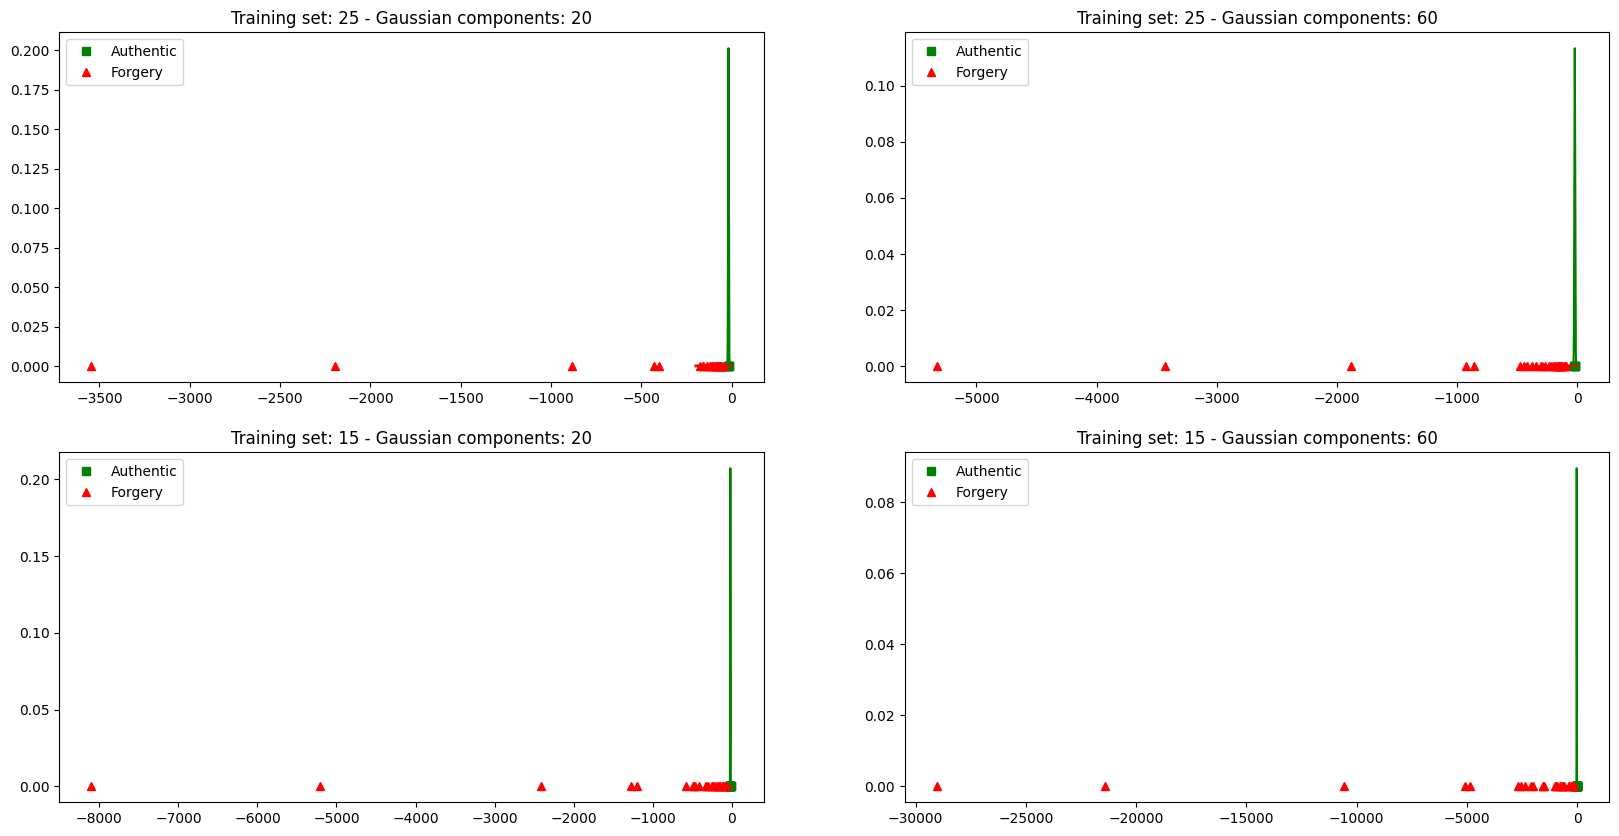

In [37]:
plt.figure(figsize=(20,10))
x = np.arange(-200, 0, 0.01)

for i in range(0, 4):

    plt.subplot(2,2,i+1)
    aProb = norm.pdf(x, loc=np.mean(aScores[i]), scale=np.std(aScores[i]))
    fProb = norm.pdf(x, loc=np.mean(fScores[i]), scale=np.std(fScores[i]))
    plt.plot(x, aProb, 'g')
    plt.plot(aScores[i], np.zeros(len(aScores[i])), 'gs', lw=2, label='Authentic')
    plt.plot(x, fProb, 'r')
    plt.plot(fScores[i], np.zeros(len(fScores[i])), 'r^', lw=2, label='Forgery')
    plt.legend();
    plt.title('Training set: {} - Gaussian components: {}'.format(train[i], comp[i]));

plt.show()

These results have a much higher separation than the graphs in exercise 1. This is to be expected because the data is less similar to the genuine data.

**expand on this**

- **Exercise 3** (2 marks): Consider your plots from Exercise 1 or 2. Formulate a hypothesis $H_0$ about the $\mu$ and $\sigma$ of the entire population of the authentic signatures, and analytically test this hypothesis based on your sample (your 10 or more signatures) given the level of the test significance equal to 0.05 ($\alpha=0.05$, level of confidence: $1-\alpha= 0.95$). Now, change the critical values (choose reasonable values) and evaluate the FRR value.  Evaluate your FRR and FAR. You can do the calculations manually, and include in  your report using the Markdown or taking a photo and adding this photo to the notebook (see Lab 1 on Markdown). 

**Just follow the Example in Week 1 on computing Type I and Type II error**

## Conclusion
FILL IN